In [94]:
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import random
import numpy as np

In [95]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Бінарізуємо зображення:

In [96]:
def binar(images):
    return np.where(images >= 128, 1, 0)

Знаходимо еталони:

In [97]:
images = [binar(x_train[random.choice(np.argwhere(y_train == i))[0]]) for i in range(10)]

Еталони:

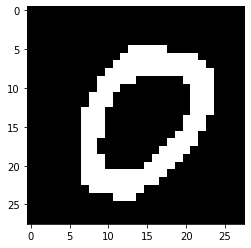

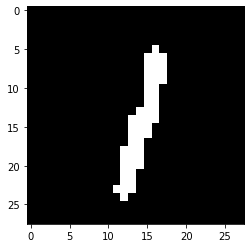

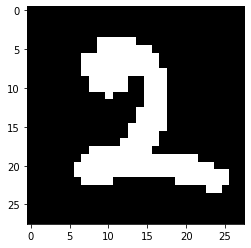

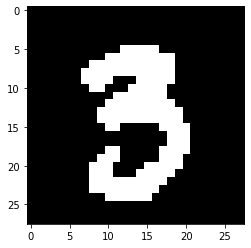

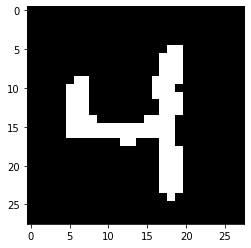

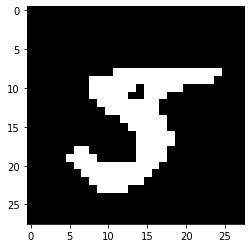

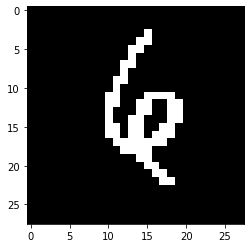

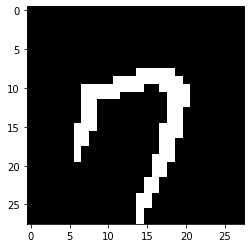

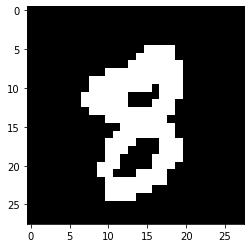

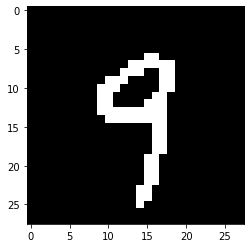

In [98]:
for sample in images:
    plt.imshow(sample, cmap='gray')
    plt.show()

In [101]:
n, p = 1, .6  # number of trials, probability of each trial
noise = np.random.choice([0, 1], size=images[1].shape, p=[1 - p, p])


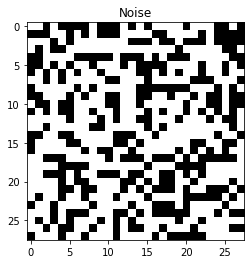

In [105]:
plt.imshow(noise, cmap='gray')
plt.title("Noise")

plt.show()


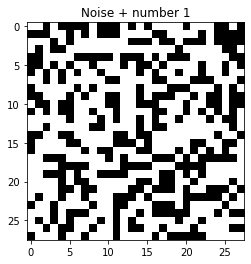

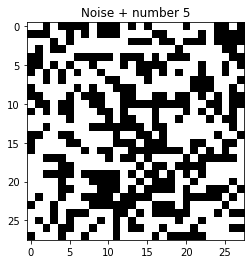

In [107]:
noisy_image_1 = np.where(noise, 1 - images[1], images[1])

plt.imshow(noisy_image_1, cmap='gray')
plt.title("Noise + number 1")
plt.show()
noisy_image_5 = np.where(noise, 1 - images[5], images[5])

plt.imshow(noisy_image_5, cmap='gray')
plt.title("Noise + number 5")
plt.show()

In [109]:
log_p = np.log(p)
log_1_p = np.log(1 - p)

In [110]:
probs= [np.sum((noisy_image_1 ^ i) * log_p + (1 ^ noisy_image_1 ^ i) * log_1_p) for i in images]
print(likelihoods)

[-541.5891466541777, -529.4251934109329, -537.9399606812044, -541.994611762286, -537.5344955730961, -537.9399606812044, -536.3181002487718, -538.3454257893125, -541.994611762286, -535.5071700325553]


In [111]:
np.argmax(probs)

1

In [112]:
probs = [np.sum((noisy_image_5 ^ i) * log_p + (1 ^ noisy_image_5 ^ i) * log_1_p) for i in images]
print(probs)
np.argmax(probs)

[-541.1836815460697, -537.9399606812044, -535.1017049244472, -535.9126351406636, -544.427402410935, -529.4251934109329, -545.6437977352596, -546.0492628433676, -531.8579840595819, -538.3454257893125]


5